In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model_1d import hjb_modified
from numba import njit

Equation with damage function $j$:

\begin{align}
0 = \max_e  &-\delta \phi(y) + \delta\eta\log e  + \frac{d \phi}{d y}(y) \mu_2 e\\
& + (\eta-1)\left(\frac{d}{d \tau}\Lambda_j(y)\mu_2 e\right)\\
\end{align}

where

\begin{equation}
\Lambda_j(\tau)=
\begin{cases}
  \lambda_1 \tau + \frac{\lambda_2}{2}\tau^2, & \tau\leq \bar{\tau} \\
  \lambda_1 \tau + \frac{\lambda_2}{2}\tau^2 + \frac{\lambda_{2,j}^+}{2}(\tau-\bar{\tau})^2, & \tau > \bar{\tau}
\end{cases}
\end{equation}

FOC of $e$ gives :

$$
e^* = -\frac{\delta \eta}{\frac{\partial \phi}{\partial y}(y)\mu_2 + (\eta-1)\frac{d}{d \tau}\Lambda_j(y)\mu_2}
$$

In [2]:
# Model parameters
η = .032
δ = .01
μ_2 = 1.86/1000.
# Damage setting
λ_1 = 1.7675/10000
λ_2 = 0.0022*2
λ_bar = 2.
# # Three damages
# λ_2p_state = np.array([0., 0.0197*2, 0.3853*2])
# λ_2p_prior = np.array([0.4875, 0.4875, 0.025])

# Two damages
λ_2p_state = np.array([0., 0.0197*2])
λ_2p_prior = np.array([0.5, 0.5])

In [3]:
# Grid setting
n_y = 100
y_min = 1e-10
y_max = 10
y_grid = np.linspace(y_min, y_max, n_y)

# Solve for each damage function
ϕ_list = []
e_list = []
for λ_2p in λ_2p_state:
    pde_paras = (η, δ, μ_2, λ_1, λ_2, λ_bar, λ_2p)
    ϕ, e = hjb_modified(y_grid, model_paras=pde_paras, v0=None,
                        ϵ=.5, tol=1e-8, max_iter=10_000, bc=(0, 0), impose_bc=(False, False))
    ϕ_list.append(ϕ)
    e_list.append(e)

# Compute boundary condition
ϕ_mean = np.average(np.array(ϕ_list), axis=0, weights=[0.5, 0.5])
ϕ_bc = np.interp(λ_bar, y_grid, ϕ_mean)
bc_5 = (0, ϕ_bc)
impose_bc_5 = (False, True)

ϕ_mean = np.average(np.array(ϕ_list), axis=0, weights=[0.4, 0.6])
ϕ_bc = np.interp(λ_bar, y_grid, ϕ_mean)
bc_6 = (0, ϕ_bc)
impose_bc_6 = (False, True)

ϕ_mean = np.average(np.array(ϕ_list), axis=0, weights=[0.3, 0.7])
ϕ_bc = np.interp(λ_bar, y_grid, ϕ_mean)
bc_7 = (0, ϕ_bc)
impose_bc_7 = (False, True)

Iteration 1: LHS Error: 0.0012399145351601527; RHS Error 0.0014606468243815764
Iteration 2: LHS Error: 0.0011876787746095087; RHS Error 0.0013754243917120973
Iteration 3: LHS Error: 0.0011513420067673081; RHS Error 0.001295435545230069
Iteration 4: LHS Error: 0.0011211796888625876; RHS Error 0.0012301280923770648
Iteration 5: LHS Error: 0.0010928298046417526; RHS Error 0.0011747999870947738
Iteration 6: LHS Error: 0.0010651126685647314; RHS Error 0.0011269963952911556
Iteration 7: LHS Error: 0.0010380723005553967; RHS Error 0.0010854283491834888
Iteration 8: LHS Error: 0.0010122356929496094; RHS Error 0.0010492024024021658
Iteration 9: LHS Error: 0.0009880115799277486; RHS Error 0.0010175416981931856
Iteration 10: LHS Error: 0.0009655211360293393; RHS Error 0.0009897225098399402
Iteration 11: LHS Error: 0.000944787890739443; RHS Error 0.0009650857300969329
Iteration 12: LHS Error: 0.0009256793369696766; RHS Error 0.0009430601679140025
Iteration 13: LHS Error: 0.0009080176987850807; RHS

Iteration 324: LHS Error: 8.717791566691113e-05; RHS Error 8.70492644193206e-05
Iteration 325: LHS Error: 8.663350623228094e-05; RHS Error 8.650418080192134e-05
Iteration 326: LHS Error: 8.609270819978643e-05; RHS Error 8.596271508456424e-05
Iteration 327: LHS Error: 8.555549511321536e-05; RHS Error 8.542484073718307e-05
Iteration 328: LHS Error: 8.502184074286878e-05; RHS Error 8.489053145710164e-05
Iteration 329: LHS Error: 8.449171908303521e-05; RHS Error 8.43597611666217e-05
Iteration 330: LHS Error: 8.396510434967308e-05; RHS Error 8.383250401070876e-05
Iteration 331: LHS Error: 8.344197097816253e-05; RHS Error 8.330873435463692e-05
Iteration 332: LHS Error: 8.292229362102943e-05; RHS Error 8.278842678171455e-05
Iteration 333: LHS Error: 8.240604714557231e-05; RHS Error 8.227155609097912e-05
Iteration 334: LHS Error: 8.189320663168353e-05; RHS Error 8.175809729498774e-05
Iteration 335: LHS Error: 8.138374736979537e-05; RHS Error 8.124802561758902e-05
Iteration 336: LHS Error: 8.08

Iteration 664: LHS Error: 1.1304741364959181e-05; RHS Error 1.1102190881315125e-05
Iteration 665: LHS Error: 1.1238865994481206e-05; RHS Error 1.1036271266377383e-05
Iteration 666: LHS Error: 1.1173381515239278e-05; RHS Error 1.0970742854760573e-05
Iteration 667: LHS Error: 1.1108285547539731e-05; RHS Error 1.0905603264398252e-05
Iteration 668: LHS Error: 1.1043575726621402e-05; RHS Error 1.0840850128242458e-05
Iteration 669: LHS Error: 1.0979249702752769e-05; RHS Error 1.0776481094210903e-05
Iteration 670: LHS Error: 1.091530514089889e-05; RHS Error 1.071249382505828e-05
Iteration 671: LHS Error: 1.0851739720818543e-05; RHS Error 1.0648885998288554e-05
Iteration 672: LHS Error: 1.0788551136980962e-05; RHS Error 1.05856553060744e-05
Iteration 673: LHS Error: 1.0725737098274402e-05; RHS Error 1.0522799455107154e-05
Iteration 674: LHS Error: 1.0663295328033895e-05; RHS Error 1.0460316166568842e-05
Iteration 675: LHS Error: 1.0601223564082884e-05; RHS Error 1.0398203175982662e-05
Iteratio

Iteration 996: LHS Error: 1.667179272066277e-06; RHS Error 3.928120540123937e-06
Iteration 997: LHS Error: 1.657694548559685e-06; RHS Error 3.937473189288181e-06
Iteration 998: LHS Error: 1.6482642282850124e-06; RHS Error 3.946772239805203e-06
Iteration 999: LHS Error: 1.6388879956336089e-06; RHS Error 3.956018002234524e-06
Iteration 1000: LHS Error: 1.6295655369119588e-06; RHS Error 3.965210785306615e-06
Iteration 1001: LHS Error: 1.6202965401890257e-06; RHS Error 3.974350895948379e-06
Iteration 1002: LHS Error: 1.611080695365641e-06; RHS Error 3.983438639273062e-06
Iteration 1003: LHS Error: 1.601917694299404e-06; RHS Error 3.9924743186006435e-06
Iteration 1004: LHS Error: 1.5928072304993712e-06; RHS Error 4.001458235461733e-06
Iteration 1005: LHS Error: 1.5837489993481002e-06; RHS Error 4.010390689627389e-06
Iteration 1006: LHS Error: 1.5747426980183832e-06; RHS Error 4.019271979097193e-06
Iteration 1007: LHS Error: 1.565788025473247e-06; RHS Error 4.028102400116702e-06
Iteration 10

Iteration 1338: LHS Error: 2.397976178458716e-07; RHS Error 5.336305235824237e-06
Iteration 1339: LHS Error: 2.384481751355194e-07; RHS Error 5.337637430489909e-06
Iteration 1340: LHS Error: 2.3710635141394043e-07; RHS Error 5.338962106165592e-06
Iteration 1341: LHS Error: 2.35772103493459e-07; RHS Error 5.340279305512691e-06
Iteration 1342: LHS Error: 2.344453882696662e-07; RHS Error 5.341589070965579e-06
Iteration 1343: LHS Error: 2.3312616305448675e-07; RHS Error 5.342891444697659e-06
Iteration 1344: LHS Error: 2.318143852847454e-07; RHS Error 5.3441864686514006e-06
Iteration 1345: LHS Error: 2.3051001268870053e-07; RHS Error 5.34547418452728e-06
Iteration 1346: LHS Error: 2.2921300324441063e-07; RHS Error 5.346754633782803e-06
Iteration 1347: LHS Error: 2.279233151936122e-07; RHS Error 5.348027857644756e-06
Iteration 1348: LHS Error: 2.2664090686130844e-07; RHS Error 5.3492938970921885e-06
Iteration 1349: LHS Error: 2.2536573703046958e-07; RHS Error 5.3505527928884985e-06
Iteration

Iteration 1666: LHS Error: 3.777012304306826e-08; RHS Error 5.535779340667935e-06
Iteration 1667: LHS Error: 3.75577985795017e-08; RHS Error 5.535988987842664e-06
Iteration 1668: LHS Error: 3.734666438603984e-08; RHS Error 5.536197459461104e-06
Iteration 1669: LHS Error: 3.7136713856855685e-08; RHS Error 5.536404762105989e-06
Iteration 1670: LHS Error: 3.692794024734436e-08; RHS Error 5.536610902345416e-06
Iteration 1671: LHS Error: 3.672033706270117e-08; RHS Error 5.536815886694356e-06
Iteration 1672: LHS Error: 3.651389764158797e-08; RHS Error 5.537019721639914e-06
Iteration 1673: LHS Error: 3.630861553083342e-08; RHS Error 5.537222413643287e-06
Iteration 1674: LHS Error: 3.6104484193999475e-08; RHS Error 5.537423969100832e-06
Iteration 1675: LHS Error: 3.590149716403701e-08; RHS Error 5.537624394387876e-06
Iteration 1676: LHS Error: 3.5699648057163635e-08; RHS Error 5.537823695858711e-06
Iteration 1677: LHS Error: 3.549893048959696e-08; RHS Error 5.5380218798073465e-06
Iteration 167

Iteration 75: LHS Error: 0.00046521119129928207; RHS Error 0.0004671018687244688
Iteration 76: LHS Error: 0.00046103390113523546; RHS Error 0.00046290785754701867
Iteration 77: LHS Error: 0.00045689315711578554; RHS Error 0.0004587508569151745
Iteration 78: LHS Error: 0.0004527883832253221; RHS Error 0.00045463024809498816
Iteration 79: LHS Error: 0.00044871904327987294; RHS Error 0.00045054545540381525
Iteration 80: LHS Error: 0.00044468463785578977; RHS Error 0.00044649594299008325
Iteration 81: LHS Error: 0.00044068470137056254; RHS Error 0.00044248121176402276
Iteration 82: LHS Error: 0.0004367187993151375; RHS Error 0.0004385007964801675
Iteration 83: LHS Error: 0.000432786525638211; RHS Error 0.00043455426297189857
Iteration 84: LHS Error: 0.00042888750027978567; RHS Error 0.0004306412055372562
Iteration 85: LHS Error: 0.00042502136685280967; RHS Error 0.0004267612444745602
Iteration 86: LHS Error: 0.00042118779046964455; RHS Error 0.00042291402376559077
Iteration 87: LHS Error: 

Iteration 377: LHS Error: 7.9231442812841e-05; RHS Error 7.940496509343902e-05
Iteration 378: LHS Error: 7.88399980208021e-05; RHS Error 7.90132139432338e-05
Iteration 379: LHS Error: 7.845048619405104e-05; RHS Error 7.862339802548334e-05
Iteration 380: LHS Error: 7.806289779575815e-05; RHS Error 7.823550778516549e-05
Iteration 381: LHS Error: 7.767722333594518e-05; RHS Error 7.784953371439473e-05
Iteration 382: LHS Error: 7.729345337145754e-05; RHS Error 7.7465466352189e-05
Iteration 383: LHS Error: 7.69115785057145e-05; RHS Error 7.708329628423839e-05
Iteration 384: LHS Error: 7.653158938841775e-05; RHS Error 7.670301414267549e-05
Iteration 385: LHS Error: 7.615347671539874e-05; RHS Error 7.632461060584639e-05
Iteration 386: LHS Error: 7.577723122828561e-05; RHS Error 7.594807639808306e-05
Iteration 387: LHS Error: 7.540284371435058e-05; RHS Error 7.55734022894768e-05
Iteration 388: LHS Error: 7.503030500638497e-05; RHS Error 7.520057909565206e-05
Iteration 389: LHS Error: 7.46596059

Iteration 691: LHS Error: 1.672307946216922e-05; RHS Error 1.6856792978544254e-05
Iteration 692: LHS Error: 1.6640422124306053e-05; RHS Error 1.6774093445829957e-05
Iteration 693: LHS Error: 1.655817327408937e-05; RHS Error 1.669180263001583e-05
Iteration 694: LHS Error: 1.6476330893272495e-05; RHS Error 1.66099185114673e-05
Iteration 695: LHS Error: 1.6394892973572994e-05; RHS Error 1.6528439080528367e-05
Iteration 696: LHS Error: 1.6313857516644936e-05; RHS Error 1.6447362337469978e-05
Iteration 697: LHS Error: 1.6233222533940106e-05; RHS Error 1.6366686292443853e-05
Iteration 698: LHS Error: 1.6152986046832907e-05; RHS Error 1.628640896543022e-05
Iteration 699: LHS Error: 1.6073146086356682e-05; RHS Error 1.620652838619282e-05
Iteration 700: LHS Error: 1.5993700693411883e-05; RHS Error 1.6127042594227627e-05
Iteration 701: LHS Error: 1.5914647918446878e-05; RHS Error 1.6050864594842915e-05
Iteration 702: LHS Error: 1.58359858215551e-05; RHS Error 1.6054603655087497e-05
Iteration 703

Iteration 999: LHS Error: 3.6346371961315516e-06; RHS Error 1.740830970939117e-05
Iteration 1000: LHS Error: 3.61666892838286e-06; RHS Error 1.7411883609556888e-05
Iteration 1001: LHS Error: 3.598789480155351e-06; RHS Error 1.7415447120170324e-05
Iteration 1002: LHS Error: 3.580998412425207e-06; RHS Error 1.741900024731282e-05
Iteration 1003: LHS Error: 3.563295288319668e-06; RHS Error 1.742254299732848e-05
Iteration 1004: LHS Error: 3.545679673214175e-06; RHS Error 1.7426075376817112e-05
Iteration 1005: LHS Error: 3.52815113455196e-06; RHS Error 1.7429597392628975e-05
Iteration 1006: LHS Error: 3.5107092420522124e-06; RHS Error 1.7433109051870474e-05
Iteration 1007: LHS Error: 3.4933535673215e-06; RHS Error 1.743661036189136e-05
Iteration 1008: LHS Error: 3.4760836843533705e-06; RHS Error 1.74401013302875e-05
Iteration 1009: LHS Error: 3.4588991689871174e-06; RHS Error 1.74435819648967e-05
Iteration 1010: LHS Error: 3.4417995994073802e-06; RHS Error 1.7447052273792578e-05
Iteration 10

Iteration 1317: LHS Error: 7.515805142133125e-07; RHS Error 1.8106703127572542e-05
Iteration 1318: LHS Error: 7.478644500069631e-07; RHS Error 1.8107843579950422e-05
Iteration 1319: LHS Error: 7.441667576324473e-07; RHS Error 1.8108979445450712e-05
Iteration 1320: LHS Error: 7.404873463706663e-07; RHS Error 1.8110110740507748e-05
Iteration 1321: LHS Error: 7.368261257800768e-07; RHS Error 1.8111237481513475e-05
Iteration 1322: LHS Error: 7.331830059464917e-07; RHS Error 1.811235968481441e-05
Iteration 1323: LHS Error: 7.295578974136907e-07; RHS Error 1.811347736671565e-05
Iteration 1324: LHS Error: 7.25950711100154e-07; RHS Error 1.811459054347844e-05
Iteration 1325: LHS Error: 7.223613584378397e-07; RHS Error 1.81156992313193e-05
Iteration 1326: LHS Error: 7.187897512611618e-07; RHS Error 1.8116803446411873e-05
Iteration 1327: LHS Error: 7.152358018763794e-07; RHS Error 1.8117903204886428e-05
Iteration 1328: LHS Error: 7.11699422922818e-07; RHS Error 1.8118998522829e-05
Iteration 1329

Iteration 1635: LHS Error: 1.5538035669226957e-07; RHS Error 1.830812948680835e-05
Iteration 1636: LHS Error: 1.5461200326971625e-07; RHS Error 1.8308425441287426e-05
Iteration 1637: LHS Error: 1.5384744908586434e-07; RHS Error 1.830872009559836e-05
Iteration 1638: LHS Error: 1.53086675294678e-07; RHS Error 1.8309013455229596e-05
Iteration 1639: LHS Error: 1.523296631750215e-07; RHS Error 1.830930552564682e-05
Iteration 1640: LHS Error: 1.5157639421392588e-07; RHS Error 1.830959631229608e-05
Iteration 1641: LHS Error: 1.5082684984291106e-07; RHS Error 1.830988582060013e-05
Iteration 1642: LHS Error: 1.5008101164615262e-07; RHS Error 1.8310174055962357e-05
Iteration 1643: LHS Error: 1.493388613604818e-07; RHS Error 1.8310461023763442e-05
Iteration 1644: LHS Error: 1.4860038069497428e-07; RHS Error 1.831074672936216e-05
Iteration 1645: LHS Error: 1.4786555151136138e-07; RHS Error 1.8311031178096856e-05
Iteration 1646: LHS Error: 1.4713435575464118e-07; RHS Error 1.8311314375283314e-05
It

Iteration 1957: LHS Error: 3.1485856130664125e-08; RHS Error 1.83587936396508e-05
Iteration 1958: LHS Error: 3.1330139121932277e-08; RHS Error 1.8358863092403756e-05
Iteration 1959: LHS Error: 3.117519213613473e-08; RHS Error 1.835893222763038e-05
Iteration 1960: LHS Error: 3.1021011426268785e-08; RHS Error 1.8359001046752764e-05
Iteration 1961: LHS Error: 3.0867593189820575e-08; RHS Error 1.835906955118986e-05
Iteration 1962: LHS Error: 3.071493362427624e-08; RHS Error 1.835913774235232e-05
Iteration 1963: LHS Error: 3.0563028996510866e-08; RHS Error 1.8359205621646464e-05
Iteration 1964: LHS Error: 3.041187555952174e-08; RHS Error 1.835927319047048e-05
Iteration 1965: LHS Error: 3.026146964957288e-08; RHS Error 1.8359340450217515e-05
Iteration 1966: LHS Error: 3.0111807505783794e-08; RHS Error 1.8359407402275616e-05
Iteration 1967: LHS Error: 2.9962885478296286e-08; RHS Error 1.8359474048023944e-05
Iteration 1968: LHS Error: 2.9814699903374375e-08; RHS Error 1.835954038883911e-05
Ite

Text(0.5, 0, 'y')

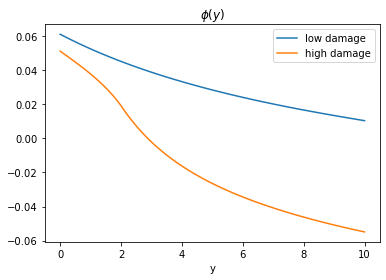

In [4]:
plt.plot(y_grid, ϕ_list[0], label='low damage')
plt.plot(y_grid, ϕ_list[1], label='high damage')
# plt.plot(y_grid, ϕ_list[2], label='extreme damage')
plt.legend()
plt.title(r'$\phi(y)$')
plt.xlabel('y')
# plt.savefig('figure.pdf')

In [5]:
# Change grid setting
n_y = 100
y_min = 1e-10
y_max = 2
y_grid = np.linspace(y_min, y_max, n_y)

pde_paras = (η, δ, μ_2, λ_1, λ_2, λ_bar, 0.)

ϕ_grid_5, e_grid_5 = hjb_modified(y_grid, model_paras=pde_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1000,
                              bc=bc_5, impose_bc=impose_bc_5)

ϕ_grid_6, e_grid_6 = hjb_modified(y_grid, model_paras=pde_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1000,
                              bc=bc_6, impose_bc=impose_bc_6)

ϕ_grid_7, e_grid_7 = hjb_modified(y_grid, model_paras=pde_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1000,
                              bc=bc_7, impose_bc=impose_bc_7)

Iteration 1: LHS Error: 0.06552484523241732; RHS Error 0.0014605798606114329
Iteration 2: LHS Error: 0.010885328842092555; RHS Error 0.015536114564290429
Iteration 3: LHS Error: 0.004454785577758927; RHS Error 0.005313270948502186
Iteration 4: LHS Error: 0.002155023180308819; RHS Error 0.002068424919512839
Iteration 5: LHS Error: 0.001432655028298055; RHS Error 0.0011728194028220523
Iteration 6: LHS Error: 0.001057168471064576; RHS Error 0.001916688660022309
Iteration 7: LHS Error: 0.0031874743840984735; RHS Error 0.0011768342646489498
Iteration 8: LHS Error: 0.001255777861369261; RHS Error 0.005191605475025545
Iteration 9: LHS Error: 0.0022890606025042746; RHS Error 0.0017853937450426774
Iteration 10: LHS Error: 0.0012337217383714336; RHS Error 0.003036323212996711
Iteration 11: LHS Error: 0.0014637812505008327; RHS Error 0.002649229517247738
Iteration 12: LHS Error: 0.009196678420944763; RHS Error 0.0022506277209561306
Iteration 13: LHS Error: 0.002154986191689256; RHS Error 0.028302

Iteration 225: LHS Error: 6.048351934523355e-05; RHS Error 6.162735570821969e-05
Iteration 226: LHS Error: 5.906517290682478e-05; RHS Error 6.019467694833003e-05
Iteration 227: LHS Error: 5.766791125025317e-05; RHS Error 5.8783170215472e-05
Iteration 228: LHS Error: 5.629155476509495e-05; RHS Error 5.739265066066019e-05
Iteration 229: LHS Error: 5.49359285711426e-05; RHS Error 5.602293816914434e-05
Iteration 230: LHS Error: 5.360086227355898e-05; RHS Error 5.467385729802368e-05
Iteration 231: LHS Error: 5.2286189737016375e-05; RHS Error 5.3345237106491123e-05
Iteration 232: LHS Error: 5.0991749013643006e-05; RHS Error 5.20369112168898e-05
Iteration 233: LHS Error: 4.971738223369382e-05; RHS Error 5.074871767738766e-05
Iteration 234: LHS Error: 4.84629354630256e-05; RHS Error 4.9480498797025894e-05
Iteration 235: LHS Error: 4.7228258640841236e-05; RHS Error 4.8232101065053294e-05
Iteration 236: LHS Error: 4.601320556976707e-05; RHS Error 4.700337510590499e-05
Iteration 237: LHS Error: 4

Iteration 26: LHS Error: 0.0009150989758019458; RHS Error 0.0048906975931892905
Iteration 27: LHS Error: 0.007790501501398206; RHS Error 0.005112504603335429
Iteration 28: LHS Error: 0.003416819953202768; RHS Error 0.005334310892132942
Iteration 29: LHS Error: 0.0015517831332291336; RHS Error 0.00555611588848684
Iteration 30: LHS Error: 0.0013284494954518104; RHS Error 0.005777918613927164
Iteration 31: LHS Error: 0.002033485137321104; RHS Error 0.005999716898258633
Iteration 32: LHS Error: 0.0012489615510824156; RHS Error 0.006221506339093883
Iteration 33: LHS Error: 0.0011741008060779726; RHS Error 0.00644327811525024
Iteration 34: LHS Error: 0.0011145096808198689; RHS Error 0.028998253533215945
Iteration 35: LHS Error: 0.0013527361658551285; RHS Error 0.0071702612957688094
Iteration 36: LHS Error: 0.0054147596399625325; RHS Error 0.04187123840810468
Iteration 37: LHS Error: 0.002366187929842306; RHS Error 0.07764058212470053
Iteration 38: LHS Error: 0.0010558660313441867; RHS Error 

Iteration 328: LHS Error: 1.1979787145066645e-06; RHS Error 3.254923740907286e-06
Iteration 329: LHS Error: 1.1164248137907062e-06; RHS Error 3.288846606442665e-06
Iteration 330: LHS Error: 1.039630903212907e-06; RHS Error 3.3091686513423e-06
Iteration 331: LHS Error: 9.673843801849547e-07; RHS Error 3.3167617536566333e-06
Iteration 332: LHS Error: 8.994769357811849e-07; RHS Error 3.3125474687603195e-06
Iteration 333: LHS Error: 8.357048197904504e-07; RHS Error 3.2975057776170325e-06
Iteration 334: LHS Error: 7.758689997833246e-07; RHS Error 3.27268081382775e-06
Iteration 335: LHS Error: 7.19775464952388e-07; RHS Error 3.2392169135881527e-06
Iteration 336: LHS Error: 6.672353991404867e-07; RHS Error 3.198368693822372e-06
Iteration 337: LHS Error: 6.180654664456053e-07; RHS Error 3.187405273470472e-06
Iteration 338: LHS Error: 5.720880617426927e-07; RHS Error 3.1871010564273137e-06
Iteration 339: LHS Error: 5.291314774530376e-07; RHS Error 3.1795526038903453e-06
Iteration 340: LHS Error

Iteration 11: LHS Error: 0.0033874118365250713; RHS Error 0.005492000488612721
Iteration 12: LHS Error: 0.0016489071527925336; RHS Error 0.0034535531111401794
Iteration 13: LHS Error: 0.0024952528832417747; RHS Error 0.0021978446357557484
Iteration 14: LHS Error: 0.002078790306279679; RHS Error 0.002347514043396743
Iteration 15: LHS Error: 0.0022903077966653813; RHS Error 0.002423510366336998
Iteration 16: LHS Error: 0.0025002520321845863; RHS Error 0.0026458927173061784
Iteration 17: LHS Error: 0.002708865612853148; RHS Error 0.003542006070479014
Iteration 18: LHS Error: 0.010772941695841386; RHS Error 0.0030899966322853727
Iteration 19: LHS Error: 0.004510883406135396; RHS Error 0.05239990047804506
Iteration 20: LHS Error: 0.0021052481111729707; RHS Error 0.039528999851872186
Iteration 21: LHS Error: 0.004559043522254277; RHS Error 0.02377758220374887
Iteration 22: LHS Error: 0.0020495845128363083; RHS Error 0.009803984559703213
Iteration 23: LHS Error: 0.005277436104243444; RHS Erro

Iteration 254: LHS Error: 2.8400466726877238e-05; RHS Error 2.908111296443601e-05
Iteration 255: LHS Error: 2.7595006095490482e-05; RHS Error 2.8264933895363778e-05
Iteration 256: LHS Error: 2.6804090699536487e-05; RHS Error 2.7463318106425347e-05
Iteration 257: LHS Error: 2.6027628993854912e-05; RHS Error 2.6676174065927037e-05
Iteration 258: LHS Error: 2.5265529726425928e-05; RHS Error 2.590341098313606e-05
Iteration 259: LHS Error: 2.4517701778747902e-05; RHS Error 2.514493875517467e-05
Iteration 260: LHS Error: 2.3784054232867113e-05; RHS Error 2.4400667976403733e-05
Iteration 261: LHS Error: 2.3064496314340044e-05; RHS Error 2.3670510092175796e-05
Iteration 262: LHS Error: 2.235893787647103e-05; RHS Error 2.295437755573716e-05
Iteration 263: LHS Error: 2.1667290297372466e-05; RHS Error 2.225218410977089e-05
Iteration 264: LHS Error: 2.0989467072532464e-05; RHS Error 2.1563845113687415e-05
Iteration 265: LHS Error: 2.032538416521512e-05; RHS Error 2.0889277372177373e-05
Iteration 2

In [6]:
ϕ_grid_natural, e_grid_natural = hjb_modified(np.linspace(1e-10, 10, 200), model_paras=pde_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1000,
                              bc=(0, 0), impose_bc=(False, False))
ϕ_bc = np.interp(λ_bar, np.linspace(1e-10, 10, 200), ϕ_grid_natural)
ϕ_grid_check, e_grid_check = hjb_modified(np.linspace(1e-10, 2, 200), model_paras=pde_paras, v0=None, ϵ=.5, tol=1e-8, max_iter=1000,
                              bc=(0, ϕ_bc), impose_bc=(False, True))
ϕ_grid_natural_check = np.interp(np.linspace(1e-10, 2, 200), np.linspace(1e-10, 10, 200), ϕ_grid_natural)


Iteration 1: LHS Error: 0.0012487690778175658; RHS Error 0.0014606025516682895
Iteration 2: LHS Error: 0.0011904134275163407; RHS Error 0.0013807432509595036
Iteration 3: LHS Error: 0.0011510326267555738; RHS Error 0.0012974806733794004
Iteration 4: LHS Error: 0.0011186840569724576; RHS Error 0.0012303405516864265
Iteration 5: LHS Error: 0.0010888589872091433; RHS Error 0.0011734099074426608
Iteration 6: LHS Error: 0.0010603646168710571; RHS Error 0.0011242749555917574
Iteration 7: LHS Error: 0.0010331014003824917; RHS Error 0.001081749587930948
Iteration 8: LHS Error: 0.001007286324540677; RHS Error 0.0010449469577425827
Iteration 9: LHS Error: 0.000983250217207455; RHS Error 0.0010130346614060997
Iteration 10: LHS Error: 0.0009610963334833016; RHS Error 0.0009852115665597368
Iteration 11: LHS Error: 0.0009407006605427325; RHS Error 0.000960742089458501
Iteration 12: LHS Error: 0.0009219459579530402; RHS Error 0.0009389877386490205
Iteration 13: LHS Error: 0.0009046337938493978; RHS E

Iteration 222: LHS Error: 0.00016652435165015467; RHS Error 0.00016676690157687484
Iteration 223: LHS Error: 0.0001654410582009186; RHS Error 0.00016568126564656658
Iteration 224: LHS Error: 0.00016436549113281462; RHS Error 0.0001646033823085282
Iteration 225: LHS Error: 0.00016329758596468624; RHS Error 0.00016353318671155474
Iteration 226: LHS Error: 0.0001622372789018417; RHS Error 0.00016247061469751973
Iteration 227: LHS Error: 0.0001611845068261314; RHS Error 0.00016141560279127462
Iteration 228: LHS Error: 0.00016013920728621955; RHS Error 0.00016036808819085125
Iteration 229: LHS Error: 0.00015910131848803633; RHS Error 0.00015932800875771615
Iteration 230: LHS Error: 0.00015807077928553515; RHS Error 0.0001582953030073741
Iteration 231: LHS Error: 0.00015704752917126974; RHS Error 0.00015726991009999084
Iteration 232: LHS Error: 0.0001560315082677899; RHS Error 0.00015625176983131257
Iteration 233: LHS Error: 0.00015502265731837106; RHS Error 0.00015524082262370446
Iteration 

Iteration 456: LHS Error: 3.880609182119188e-05; RHS Error 3.861618575703768e-05
Iteration 457: LHS Error: 3.8572230131955765e-05; RHS Error 3.838211066074901e-05
Iteration 458: LHS Error: 3.8339830679939846e-05; RHS Error 3.814949957386623e-05
Iteration 459: LHS Error: 3.810888377947519e-05; RHS Error 3.791834279404257e-05
Iteration 460: LHS Error: 3.787937981535039e-05; RHS Error 3.768863068942302e-05
Iteration 461: LHS Error: 3.765130924186788e-05; RHS Error 3.7460353698068674e-05
Iteration 462: LHS Error: 3.7424662582608015e-05; RHS Error 3.723350232729848e-05
Iteration 463: LHS Error: 3.719943042959639e-05; RHS Error 3.700806715321132e-05
Iteration 464: LHS Error: 3.6975603442970795e-05; RHS Error 3.678403882003962e-05
Iteration 465: LHS Error: 3.67531723501624e-05; RHS Error 3.6561408039564544e-05
Iteration 466: LHS Error: 3.653212794547944e-05; RHS Error 3.634016559066113e-05
Iteration 467: LHS Error: 3.631246108953823e-05; RHS Error 3.6120302318654106e-05
Iteration 468: LHS Err

Iteration 686: LHS Error: 9.931569555227115e-06; RHS Error 9.71889455962877e-06
Iteration 687: LHS Error: 9.87379846588421e-06; RHS Error 9.661086206820655e-06
Iteration 688: LHS Error: 9.8163694038228e-06; RHS Error 9.603620143865252e-06
Iteration 689: LHS Error: 9.75928029274542e-06; RHS Error 9.546494292448585e-06
Iteration 690: LHS Error: 9.702529069302579e-06; RHS Error 9.489706587282503e-06
Iteration 691: LHS Error: 9.646113683120516e-06; RHS Error 9.433254976112587e-06
Iteration 692: LHS Error: 9.590032096801204e-06; RHS Error 9.377137419579271e-06
Iteration 693: LHS Error: 9.53428228571418e-06; RHS Error 9.321351891159726e-06
Iteration 694: LHS Error: 9.478862237913277e-06; RHS Error 9.265896377058463e-06
Iteration 695: LHS Error: 9.423769954178263e-06; RHS Error 9.210768876161037e-06
Iteration 696: LHS Error: 9.369003447848301e-06; RHS Error 9.15596739990384e-06
Iteration 697: LHS Error: 9.314560744613787e-06; RHS Error 9.10148997223506e-06
Iteration 698: LHS Error: 9.26043988

Iteration 925: LHS Error: 2.4980457160594938e-06; RHS Error 2.2809948807277257e-06
Iteration 926: LHS Error: 2.4837811123112896e-06; RHS Error 2.2667229467804653e-06
Iteration 927: LHS Error: 2.469598766541292e-06; RHS Error 2.2525333191461203e-06
Iteration 928: LHS Error: 2.4554981979812984e-06; RHS Error 2.2384255166753905e-06
Iteration 929: LHS Error: 2.4414789286525407e-06; RHS Error 2.224399061071837e-06
Iteration 930: LHS Error: 2.427540483351809e-06; RHS Error 2.210453476874535e-06
Iteration 931: LHS Error: 2.413682389859617e-06; RHS Error 2.196588291493852e-06
Iteration 932: LHS Error: 2.399904178704282e-06; RHS Error 2.1828030351228687e-06
Iteration 933: LHS Error: 2.386205383120288e-06; RHS Error 2.1690972407285977e-06
Iteration 934: LHS Error: 2.3725855392703332e-06; RHS Error 2.155470444140128e-06
Iteration 935: LHS Error: 2.359044185995529e-06; RHS Error 2.1419221838714668e-06
Iteration 936: LHS Error: 2.3455808648292775e-06; RHS Error 2.1284520011730394e-06
Iteration 937:

Iteration 40: LHS Error: 0.004468432138276041; RHS Error 0.008141672680055853
Iteration 41: LHS Error: 0.0012741858326061825; RHS Error 0.09758811446945742
Iteration 42: LHS Error: 0.003407111391126025; RHS Error 0.040103056863133306
Iteration 43: LHS Error: 0.0017710929710269621; RHS Error 0.022350640561860327
Iteration 44: LHS Error: 0.0019973444142790536; RHS Error 0.01779754068055322
Iteration 45: LHS Error: 0.0022155830243261315; RHS Error 0.010528965171636165
Iteration 46: LHS Error: 0.022089185252102038; RHS Error 0.009150906648869778
Iteration 47: LHS Error: 0.00827293308969941; RHS Error 0.03148953302111392
Iteration 48: LHS Error: 0.003669294441634857; RHS Error 0.022703818883189092
Iteration 49: LHS Error: 0.005456411654608563; RHS Error 0.012913210205241835
Iteration 50: LHS Error: 0.0020423269685340834; RHS Error 0.009280842865110132
Iteration 51: LHS Error: 0.0011248999638438922; RHS Error 0.009286230673583055
Iteration 52: LHS Error: 0.012020284562100171; RHS Error 0.009

Iteration 158: LHS Error: 0.0015155826465614725; RHS Error 0.007738651867157388
Iteration 159: LHS Error: 0.000788573351978919; RHS Error 0.0015201230625388241
Iteration 160: LHS Error: 0.0007198800837266844; RHS Error 0.0008707756178381056
Iteration 161: LHS Error: 0.0006606897238961573; RHS Error 0.0007662068188183844
Iteration 162: LHS Error: 0.0006149570529885295; RHS Error 0.0006812338836843779
Iteration 163: LHS Error: 0.00074806703551418; RHS Error 0.0007725204333503131
Iteration 164: LHS Error: 0.00098397835969935; RHS Error 0.0009982115802060158
Iteration 165: LHS Error: 0.001159086124624828; RHS Error 0.0011627341915685487
Iteration 166: LHS Error: 0.0013809584686959864; RHS Error 0.0013892274058727291
Iteration 167: LHS Error: 0.0013869438112177335; RHS Error 0.0013816514032337916
Iteration 168: LHS Error: 0.0016023623821435073; RHS Error 0.0016028756969991365
Iteration 169: LHS Error: 0.0017164610494991572; RHS Error 0.001722857469773957
Iteration 170: LHS Error: 0.00109735

Iteration 377: LHS Error: 1.0937300315427834e-06; RHS Error 3.87753826741285e-06
Iteration 378: LHS Error: 9.711370639042816e-07; RHS Error 3.5111512827596357e-06
Iteration 379: LHS Error: 8.606445853348577e-07; RHS Error 3.422100529999468e-06
Iteration 380: LHS Error: 3.7646327923357426e-06; RHS Error 3.657662284522697e-06
Iteration 381: LHS Error: 2.6884544504224284e-06; RHS Error 2.90881598673633e-06
Iteration 382: LHS Error: 1.2961094480457014e-06; RHS Error 2.6812855695312757e-06
Iteration 383: LHS Error: 1.823808346596012e-06; RHS Error 3.1323736217871373e-06
Iteration 384: LHS Error: 7.96467544084134e-07; RHS Error 3.0692403606405374e-06
Iteration 385: LHS Error: 8.677511750404543e-07; RHS Error 3.4216091131838077e-06
Iteration 386: LHS Error: 3.0187485632743316e-06; RHS Error 3.5594033652848424e-06
Iteration 387: LHS Error: 3.1220538185827706e-06; RHS Error 4.4454997766171745e-06
Iteration 388: LHS Error: 1.5829675210771166e-06; RHS Error 4.3839575658969655e-06
Iteration 389: L

Iteration 507: LHS Error: 1.0705169027624972e-06; RHS Error 8.008401237711888e-06
Iteration 508: LHS Error: 9.615121408651506e-07; RHS Error 8.112829381634124e-06
Iteration 509: LHS Error: 8.701431758739719e-07; RHS Error 8.362052377484876e-06
Iteration 510: LHS Error: 7.917087637421272e-07; RHS Error 8.49951221284671e-06
Iteration 511: LHS Error: 1.1863297569442155e-06; RHS Error 8.561445897031783e-06
Iteration 512: LHS Error: 6.989860076855869e-07; RHS Error 7.030777719552162e-06
Iteration 513: LHS Error: 6.145804594542836e-07; RHS Error 8.129326042731716e-06
Iteration 514: LHS Error: 1.0301119665462322e-06; RHS Error 7.84292424791549e-06
Iteration 515: LHS Error: 1.7183638861550943e-06; RHS Error 6.834951089550916e-06
Iteration 516: LHS Error: 2.543147493996867e-06; RHS Error 5.120236126046184e-06
Iteration 517: LHS Error: 4.311672726575733e-06; RHS Error 2.9464148625026228e-06
Iteration 518: LHS Error: 2.448943218921751e-06; RHS Error 6.401717118900566e-06
Iteration 519: LHS Error:

Iteration 635: LHS Error: 2.6512592597727203e-06; RHS Error 8.638987186800019e-06
Iteration 636: LHS Error: 2.2551893445327265e-06; RHS Error 8.339737776118412e-06
Iteration 637: LHS Error: 1.9164388494335993e-06; RHS Error 8.414965017288943e-06
Iteration 638: LHS Error: 1.5851130207855668e-06; RHS Error 8.426284960395846e-06
Iteration 639: LHS Error: 1.2749374321968654e-06; RHS Error 8.25186705288969e-06
Iteration 640: LHS Error: 1.1562481553456516e-06; RHS Error 8.009097197044803e-06
Iteration 641: LHS Error: 1.0551084809601319e-06; RHS Error 7.745231036983898e-06
Iteration 642: LHS Error: 9.6824577588972e-07; RHS Error 7.536417620699351e-06
Iteration 643: LHS Error: 8.933474342359693e-07; RHS Error 7.377523343961518e-06
Iteration 644: LHS Error: 8.281721010638954e-07; RHS Error 7.21549427965039e-06
Iteration 645: LHS Error: 7.709110305398337e-07; RHS Error 7.164978392316642e-06
Iteration 646: LHS Error: 7.798475258197213e-07; RHS Error 6.980881882796461e-06
Iteration 647: LHS Error:

Iteration 762: LHS Error: 1.6829444379751202e-06; RHS Error 1.2322488044530836e-05
Iteration 763: LHS Error: 1.5711742814283891e-06; RHS Error 1.3298771594781903e-05
Iteration 764: LHS Error: 1.3897692556219532e-06; RHS Error 1.3974898610045463e-05
Iteration 765: LHS Error: 9.209930931203258e-06; RHS Error 1.4357840873656944e-05
Iteration 766: LHS Error: 2.9568252859768496e-06; RHS Error 9.548028873677711e-06
Iteration 767: LHS Error: 1.825360122484354e-06; RHS Error 8.483450903285406e-06
Iteration 768: LHS Error: 3.684599887851525e-06; RHS Error 8.192386737305448e-06
Iteration 769: LHS Error: 1.9411249532197417e-06; RHS Error 5.977299466786222e-06
Iteration 770: LHS Error: 1.2238310881651504e-06; RHS Error 6.5014998829240195e-06
Iteration 771: LHS Error: 1.08496643029532e-06; RHS Error 6.227985504682451e-06
Iteration 772: LHS Error: 9.917244402496417e-07; RHS Error 6.357747556073596e-06
Iteration 773: LHS Error: 9.109149643332648e-07; RHS Error 6.555207117271353e-06
Iteration 774: LHS

Iteration 895: LHS Error: 1.2579261720740975e-06; RHS Error 9.704772706466873e-06
Iteration 896: LHS Error: 1.769105359386569e-06; RHS Error 8.392138041312508e-06
Iteration 897: LHS Error: 3.195053391441549e-06; RHS Error 6.141216851689689e-06
Iteration 898: LHS Error: 3.2997635560222394e-06; RHS Error 2.7344925695703143e-06
Iteration 899: LHS Error: 2.2392173135432625e-06; RHS Error 2.788555552426966e-06
Iteration 900: LHS Error: 2.7016931163637015e-06; RHS Error 4.738627892535391e-06
Iteration 901: LHS Error: 1.9742088323837503e-06; RHS Error 5.899430964900884e-06
Iteration 902: LHS Error: 1.563706433546641e-06; RHS Error 5.472334441100103e-06
Iteration 903: LHS Error: 1.7117266412208787e-06; RHS Error 7.191195952835046e-06
Iteration 904: LHS Error: 1.8386369570189132e-06; RHS Error 8.701084191289747e-06
Iteration 905: LHS Error: 1.8034990751092383e-06; RHS Error 9.829130157702369e-06
Iteration 906: LHS Error: 4.115448420841106e-06; RHS Error 1.0468066791403268e-05
Iteration 907: LHS

In [18]:
# ϕ_grid_check, e_grid_check = hjb_modified(np.linspace(1e-10, 10, 200), 
#                                           model_paras=pde_paras, v0=None, 
#                                           ϵ=.5, tol=1e-8, max_iter=1000,
#                                           bc=(0, ϕ_bc), impose_bc=(False, False))

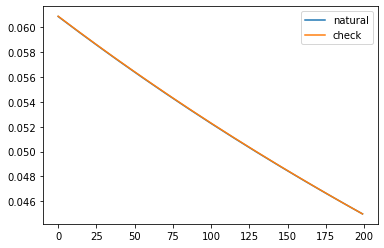

In [8]:
plt.plot(ϕ_grid_natural_check, label='natural')
plt.plot(ϕ_grid_check, label='check')
plt.legend()

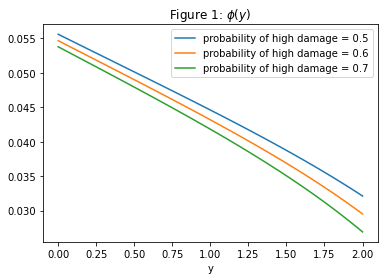

In [9]:
plt.plot(y_grid, ϕ_grid_5, label='probability of high damage = 0.5')
plt.plot(y_grid, ϕ_grid_6, label='probability of high damage = 0.6')
plt.plot(y_grid, ϕ_grid_7, label='probability of high damage = 0.7')
plt.title(r'Figure 1: $\phi(y)$')
plt.xlabel('y')
plt.legend()
plt.savefig('fig_1.pdf')

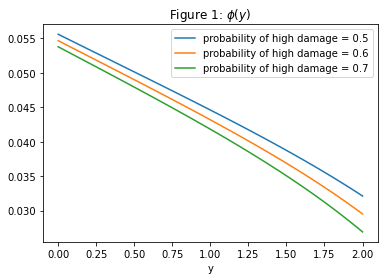

In [10]:
plt.plot(y_grid, ϕ_grid_5, label='probability of high damage = 0.5')
plt.plot(y_grid, ϕ_grid_6, label='probability of high damage = 0.6')
plt.plot(y_grid, ϕ_grid_7, label='probability of high damage = 0.7')
plt.title(r'Figure 1: $\phi(y)$')
plt.xlabel('y')
plt.legend()

In [11]:
def combine_two_grids(y_grid, y_bar, y_grid_before, y_grid_after, ϕ_grid_before, ϕ_grid_after):
    ϕ_grid = np.zeros_like(y_grid)
    for i, y in enumerate(y_grid):
        if y < y_bar:
            ϕ_grid[i] = np.interp(y, y_grid_before, ϕ_grid_before)
        else:
            ϕ_grid[i] = np.interp(y, y_grid_after, ϕ_grid_after)
    return ϕ_grid

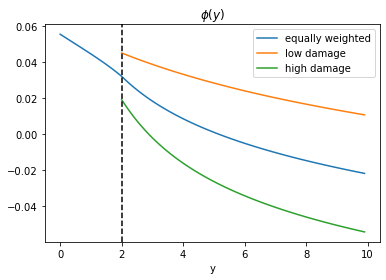

In [12]:
ϕ_grid_5_com = combine_two_grids(np.arange(0., 10, 0.1), 2., np.linspace(1e-10, 2, 100), np.linspace(1e-10, 10, 100), ϕ_grid_5, np.average(np.array(ϕ_list), axis=0, weights=[0.5, 0.5]))
ϕ_grid_5_low = combine_two_grids(np.arange(2., 10, 0.1), 2., np.linspace(1e-10, 2, 100), np.linspace(1e-10, 10, 100), ϕ_grid_5, ϕ_list[0])
ϕ_grid_5_high = combine_two_grids(np.arange(2., 10, 0.1), 2., np.linspace(1e-10, 2, 100), np.linspace(1e-10, 10, 100), ϕ_grid_5, ϕ_list[1])
plt.plot(np.arange(0, 10, 0.1), ϕ_grid_5_com, label='equally weighted')
plt.plot(np.arange(2., 10, 0.1), ϕ_grid_5_low, label='low damage')
plt.plot(np.arange(2., 10, 0.1), ϕ_grid_5_high, label='high damage')
plt.legend()
plt.title(r'$\phi(y)$')
plt.xlabel('y')
plt.axvline(x=2., linestyle='dashed', color='black')
plt.savefig('fig.pdf')

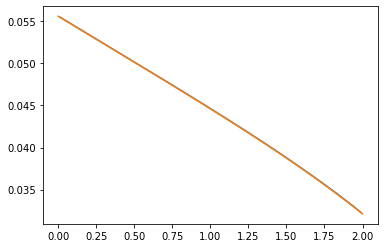

In [15]:
check = np.load('check.npy')
y_check = np.arange(.01, 2., .01)
plt.plot(y_check, check)
plt.plot(np.linspace(1e-10, 2, 100), ϕ_grid_5)

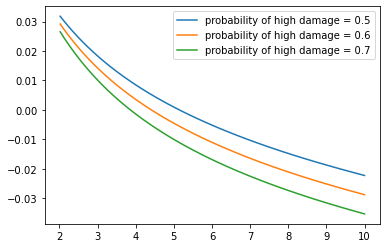

In [58]:
plt.plot(np.linspace(1e-10, 10, 100)[20:], np.average([ϕ_list[0][20:], ϕ_list[1][20:]], axis=0, weights=[0.5, 0.5]), label='probability of high damage = 0.5')
plt.plot(np.linspace(1e-10, 10, 100)[20:], np.average([ϕ_list[0][20:], ϕ_list[1][20:]], axis=0, weights=[0.4, 0.6]), label='probability of high damage = 0.6')
plt.plot(np.linspace(1e-10, 10, 100)[20:], np.average([ϕ_list[0][20:], ϕ_list[1][20:]], axis=0, weights=[0.3, 0.7]), label='probability of high damage = 0.7')
# plt.plot(np.linspace(1e-10, 10, 100)[20:], ϕ_list[0][20:], label='low damage')
# plt.plot(np.linspace(1e-10, 10, 100)[20:], ϕ_list[1][20:], label='high damage')
plt.legend()

In [ ]:
plt.plot(np.linspace(1e-10, 2., 100), ϕ_grid)
plt.plot(np.linspace(1e-10, 2., 100), np.interp(np.linspace(1e-10, 2., 100), np.linspace(1e-10, 10, 100), ϕ_grid_natural))
plt.ylim(-0.2, 0.1)
plt.xlabel('y')
plt.title(r'$\phi(y)$')
plt.savefig('fig.pdf')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
fig.suptitle('Figure 1')
ax1.plot(y_grid, ϕ_grid)
ax1.set_ylim([-1., .2])
ax1.title.set_text(r'Boundary condition: $\phi(y=2)=constant$')
ax2.plot(y_grid, ϕ_grid_natural)
ax2.set_ylim([-1., .2])
ax2.title.set_text(r'Natural boundary condition')
fig.savefig('figure_1.pdf')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
fig.suptitle('Figure 2: rescaled vertical axis')
ax1.plot(y_grid, ϕ_grid)
ax1.set_ylim([-.05, .08])
ax1.title.set_text(r'Boundary condition: $\phi(y=2)=constant$')
ax2.plot(y_grid, ϕ_grid_natural)
ax2.set_ylim([-.05, .08])
ax2.title.set_text(r'Natural boundary condition')
fig.savefig('figure_2.pdf')

In [ ]:
plt.plot(y_grid, ϕ_grid)
plt.title(r'$\phi(y)$')
plt.xlabel('y')
plt.savefig('figure.pdf')

In [ ]:
plt.plot(y_grid, e_grid_5[25], label='prob of high damage = 0.5')
plt.plot(y_grid, e_grid_6[25], label='prob of high damage = 0.6')
plt.plot(y_grid, e_grid_7[25], label='prob of high damage = 0.7')
plt.xlabel('y')
plt.legend()
plt.title(r'Figure 1: $e(y, z_2)$, $z_2=1.86/1000$')
plt.ylim(0, None)
# plt.savefig('fig_1.pdf')

In [ ]:
@njit
def simulation(y_grid, z_grid, e_grid, yoz_start=290, z_loc=25, T=100):
    Et = np.zeros(T+1)
    z = z_grid[z_loc]
    for i in range(T+1):
        Et[i] = np.interp(yoz_start*z, y_grid, e_grid[z_loc])
        yoz_start = yoz_start + Et[i]
        if yoz_start*z > 2:
            print('Warning')
    return Et


@njit(parallel=True)
def simulate_capital(α_k, β_k, σ_k, β_z, σ_z, ioverk, κ, Ws, k_start, N=100_000, T=100, dt=1.):
    var_z = dt*σ_z@σ_z/(1-(1-β_z*dt)**2)
    std_z = np.sqrt(var_z)

    time_periods = int(T/dt)
    z_path = np.zeros((N, time_periods+1))
    k_path = np.zeros((N, time_periods+1))
    for i in range(N):
        z0 = np.random.normal(0.,std_z)
        k0 = k_start
        z_path[i, 0] = z0
        k_path[i, 0] = k0
        for j in range(1, time_periods+1):
            k1 = k0 + (α_k + β_k*z0 + ioverk - κ/2.*ioverk**2 - σ_k@σ_k/2.)*dt + σ_k@Ws[i, j]*np.sqrt(dt)
            z1 = (1.-β_z*dt)*z0 + σ_z@Ws[i, j]*np.sqrt(dt)
            k_path[i, j] = k1
            z_path[i, j] = z1
            k0 = k1
            z0 = z1
    return k_path

In [ ]:
T = 100
# Et = simulation(y_grid, z_grid, e_grid, yoz_start=290, z_loc=25, T=T)
Et_5 = simulation(y_grid, z_grid, e_grid_5, yoz_start=290, z_loc=25, T=T)
Et_6 = simulation(y_grid, z_grid, e_grid_6, yoz_start=290, z_loc=25, T=T)
Et_7 = simulation(y_grid, z_grid, e_grid_7, yoz_start=290, z_loc=25, T=T)

In [ ]:
plt.figure()
plt.title(r'Figure 2: Emission trajectory, $z_2=1.86/1000$')
plt.plot(Et_5, label='prob of high damage = 0.5')
plt.plot(Et_6, label='prob of high damage = 0.6')
plt.plot(Et_7, label='prob of high damage = 0.7')
plt.legend()
plt.ylim(0, 10)
plt.xlabel('Year')
plt.savefig('fig_2.pdf')

In [ ]:
(1+0.01/100)**(365*3)

In [ ]:
from scipy.integrate import solve_ivp

def fun(y, ϕ, δ, η, μ_2, λ_1, λ_2, λ_bar):
    dΛ = λ_1 + λ_2*y + λ_2p*(y>λ_bar)*(y-λ_bar)
    dϕ = (-np.exp(-(ϕ/η+1.-np.log(δ*η))) - (η-1)*dΛ*μ_2)/μ_2
    return dϕ

sol = solve_ivp(fun, t_span=[0, 10], y0=[0.05], args=(δ, η, μ_2, λ_1, λ_2, λ_bar), dense_output=True)

In [ ]:
plt.plot(sol.sol(np.linspace(0, 10))[0])